#                   Heart Diseases Project Summary 

#### 1.Import the Necessary Libraries 
#### 2.Import the Dataset
#### 3.Basic Check
#### 4.Expolatory Data Analysis
#### 5.Data Preprocessing
#### 6.Handle the outliers with KNN Imputers
#### 7.Label Encoding Method
#### 8.Implement the KNN Imputer
#### 9.Features Correlation
#### 10.Feature Scaling
#### 11.Data Splitting into train and test
#### 12.Logistic Regression Model
#### 13.Logistic Model Evaluation Metrics
#### 14.Hyper Parameter Tuning for Logistic Regression
#### 15.Logistic Hyper Parameter Evaluation Metrics
#### 16.Artificial Neural Network Model
#### 17.Artificial Neural Network Metrics
#### 18.Hyper Parameter Tuning for Artificial Neural Network
#### 19.Artificial Neural Networks Hyper Parmeter Evaluation Metrics
#### 20.Support Vector Machines Model
#### 21.Support Vector Machine Evaluation Metrics
#### 22.Hyper Parameter Tuning For Support Vector Machine
#### 23.Support Vector Machine Hyper Parameter Evaluation Metrics
#### 24.Decision Tree Model
#### 25.Decision Tree Evaluation Metrics
#### 26.Hyper Parameter Tuning For Decision Tree
#### 27.Decision Tree Hyper Parameter Evaluation Metrics 
#### 28.XGBoost model
#### 29.XGBoost Evaluation Metrics
#### 30.Naive Bayes Theorem Model
#### 31.Naive Bayes Thereom Evaluation Metrics
#### 32.Comparision for all models f1_Score Percentages


## 1. Import the Necessary Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,f1_score,accuracy_score

## 2. Import the Dataset:

In [2]:
dt1=pd.read_csv('values.csv')
dt2=pd.read_csv('labels.csv')
dt=pd.concat([dt1,dt2],axis=1)
dt.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


## 3.Basic Check :

In [3]:
dt.drop(['patient_id'],axis=1,inplace=True)

In [4]:
dt.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [5]:
dt.shape

(180, 14)

In [6]:
dt.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [8]:
dt.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [9]:
dt.fasting_blood_sugar_gt_120_mg_per_dl.value_counts()

fasting_blood_sugar_gt_120_mg_per_dl
0    151
1     29
Name: count, dtype: int64

In [10]:
dt.loc[dt.resting_blood_pressure>170,'resting_blood_pressure'].value_counts()

resting_blood_pressure
180    3
178    2
172    1
Name: count, dtype: int64

In [11]:
dt.loc[dt.chest_pain_type<1.0,'chest_pain_type'].value_counts()

Series([], Name: count, dtype: int64)

In [12]:
dt.loc[dt.num_major_vessels>2.8,'num_major_vessels'].value_counts()

num_major_vessels
3    14
Name: count, dtype: int64

In [13]:
dt.loc[dt.fasting_blood_sugar_gt_120_mg_per_dl>0.90,'fasting_blood_sugar_gt_120_mg_per_dl'].value_counts()

fasting_blood_sugar_gt_120_mg_per_dl
1    29
Name: count, dtype: int64

In [14]:
dt.loc[dt.serum_cholesterol_mg_per_dl>400,'serum_cholesterol_mg_per_dl'].value_counts()

serum_cholesterol_mg_per_dl
417    1
564    1
Name: count, dtype: int64

In [15]:
dt.loc[dt.oldpeak_eq_st_depression>3.8,'oldpeak_eq_st_depression'].value_counts()

oldpeak_eq_st_depression
4.2    2
5.6    1
6.2    1
Name: count, dtype: int64

## 4. Expolatory Data Analysis :

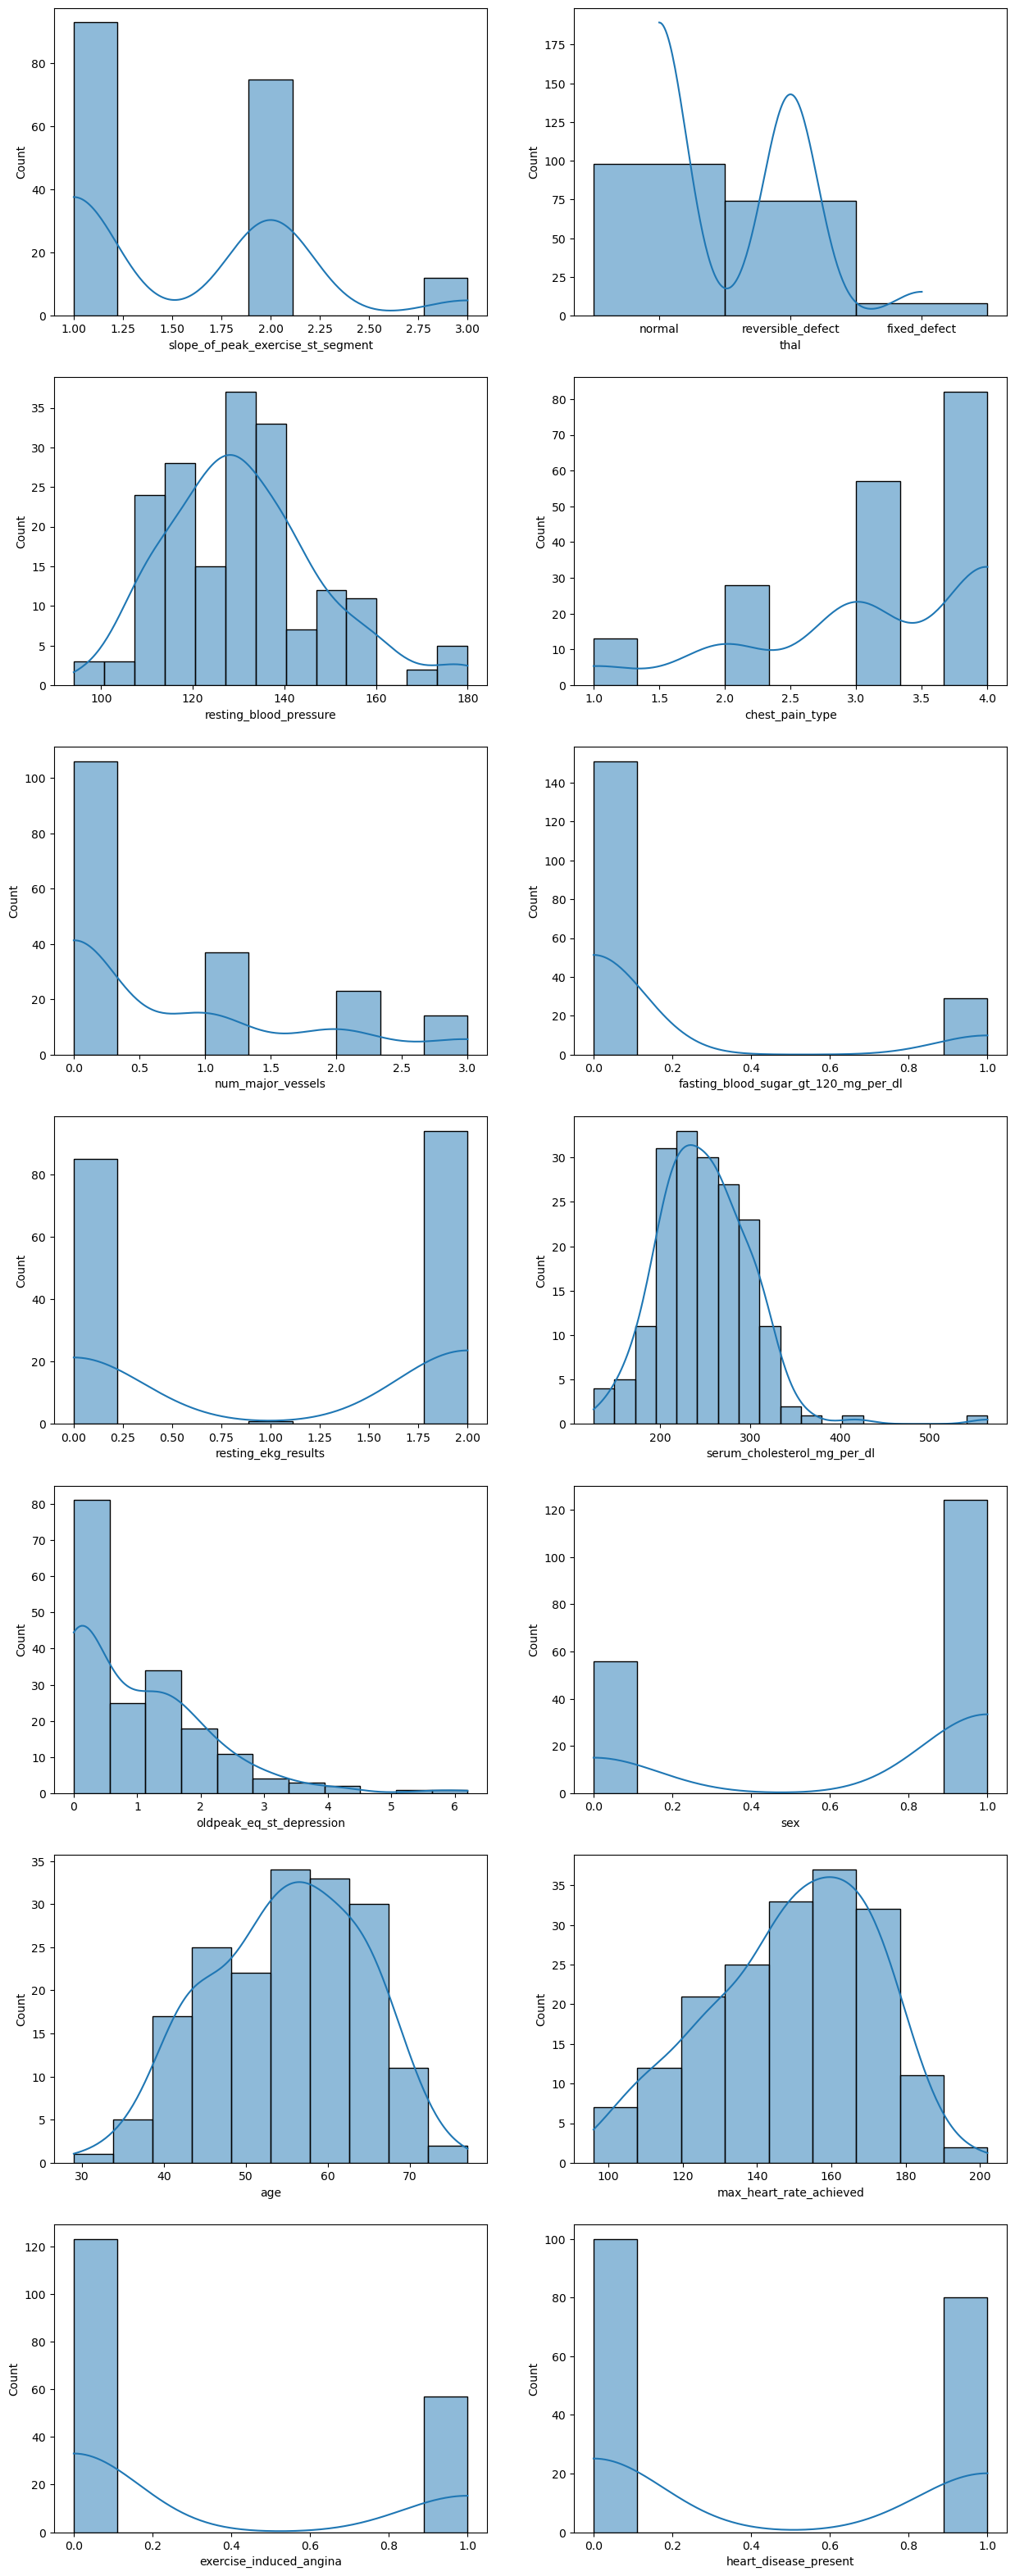

In [16]:
plt.figure(figsize=(15,40))
plotnumber=1
for i in dt:
    plt.subplot(7,2,plotnumber)
    sns.histplot(x=i,data=dt,kde=True,palette='g')
    plotnumber+=1

## 5.Data Preprocessing :

#### a.Check the Outliers with help of box Plot:

In [17]:
len(dt.columns)

14

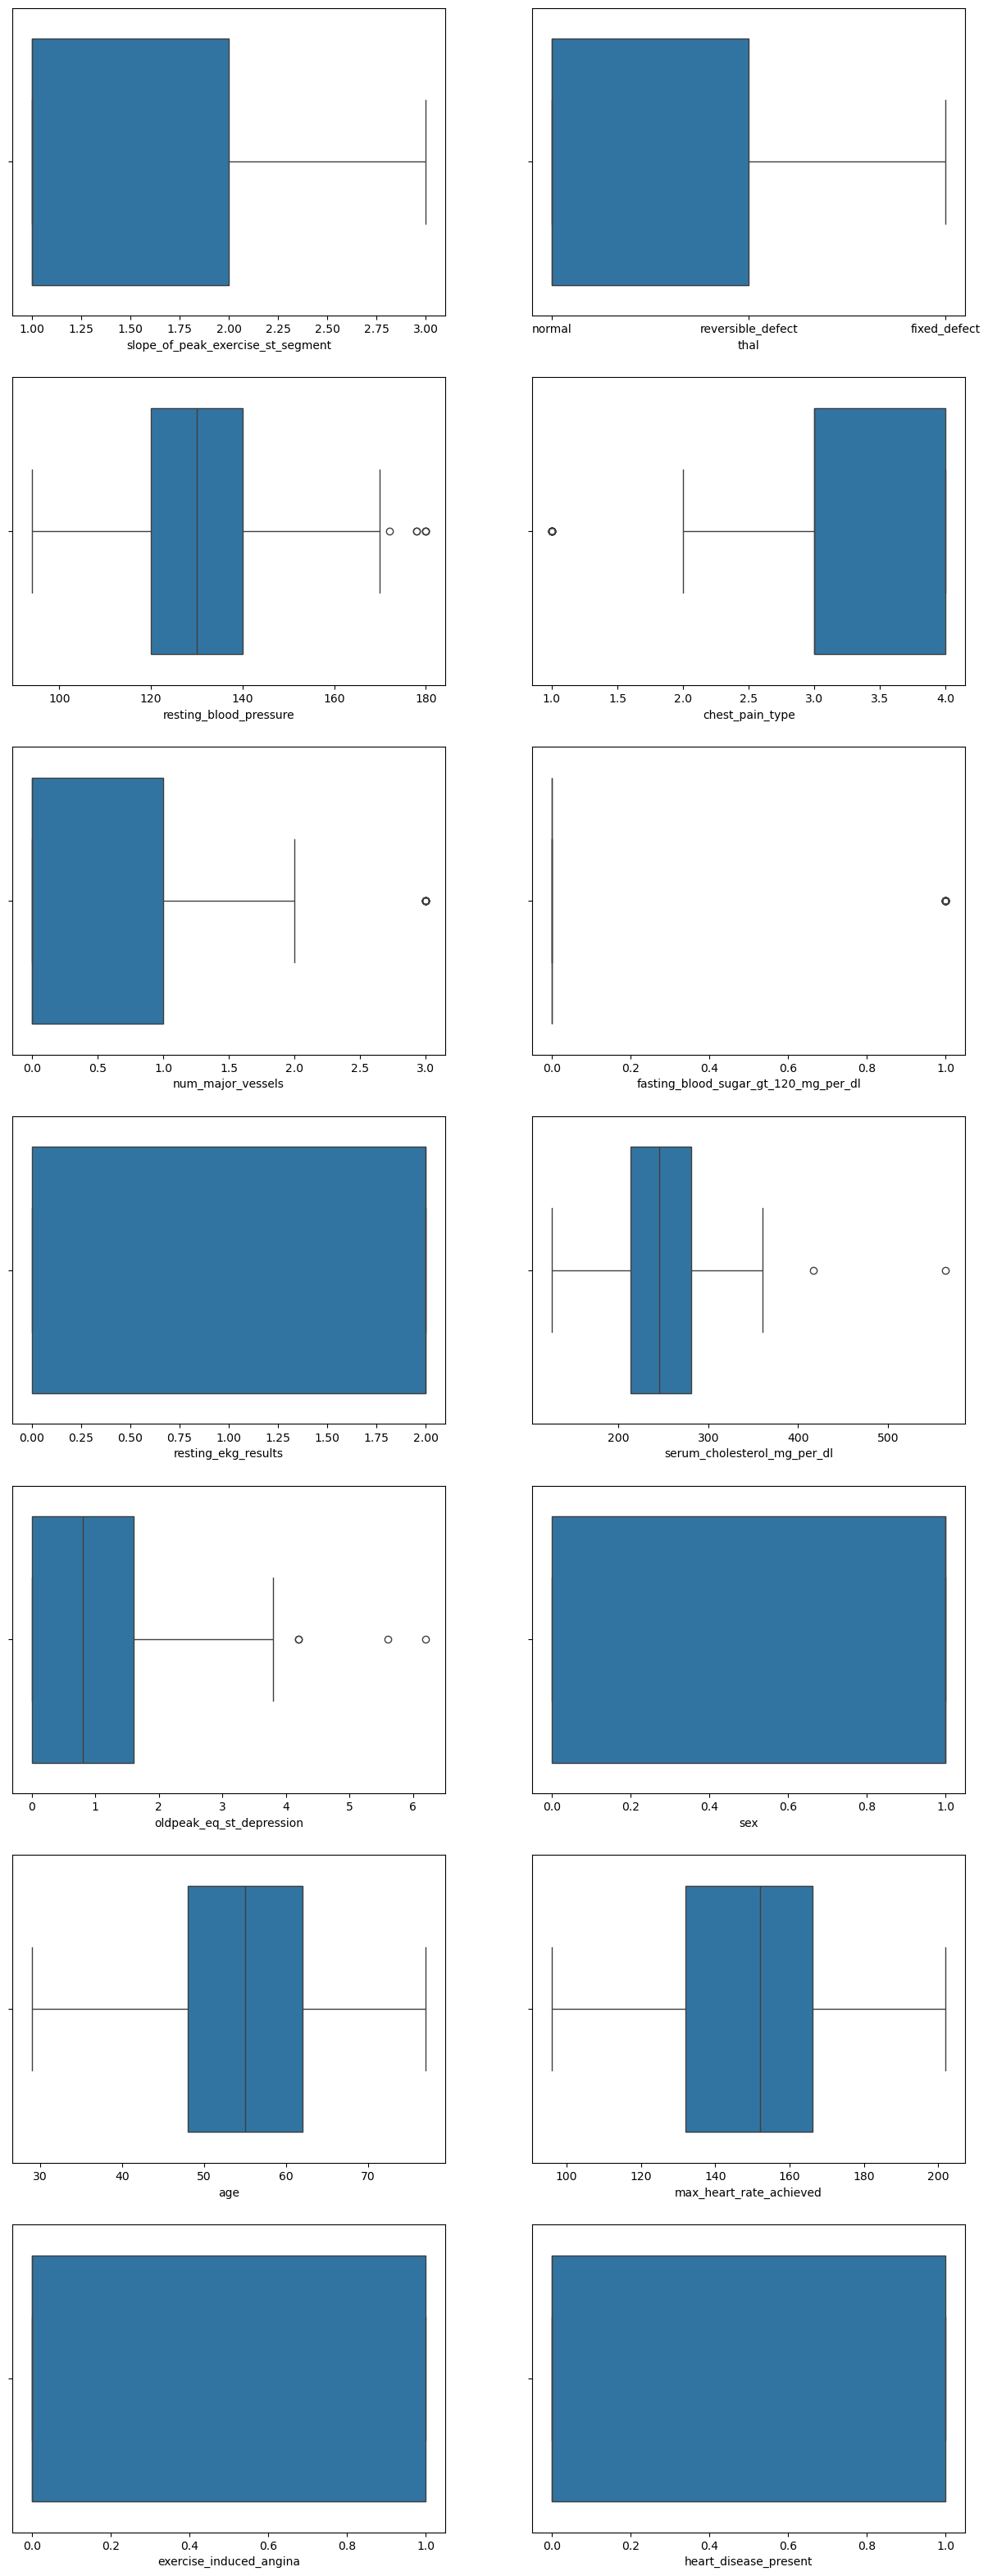

In [18]:
plt.figure(figsize=(15,40))
plotnumber=1
for i in dt:
    plt.subplot(7,2,plotnumber)
    sns.boxplot(x=i,data=dt)
    plotnumber+=1

## 6.Handle the outliers with KNN Imputers:

#### a.outliers to convert the np.NaN 

In [19]:
dt.loc[dt.resting_blood_pressure>170,'resting_blood_pressure']=np.nan

In [20]:
dt.loc[dt.serum_cholesterol_mg_per_dl>400,'serum_cholesterol_mg_per_dl']=np.nan

In [21]:
dt.loc[dt.oldpeak_eq_st_depression>3.8,'oldpeak_eq_st_depression']=np.nan

In [22]:
dt.loc[dt.num_major_vessels>2.8,'num_major_vessels']=np.nan

### b.Convert to np.nan to check the box plot:

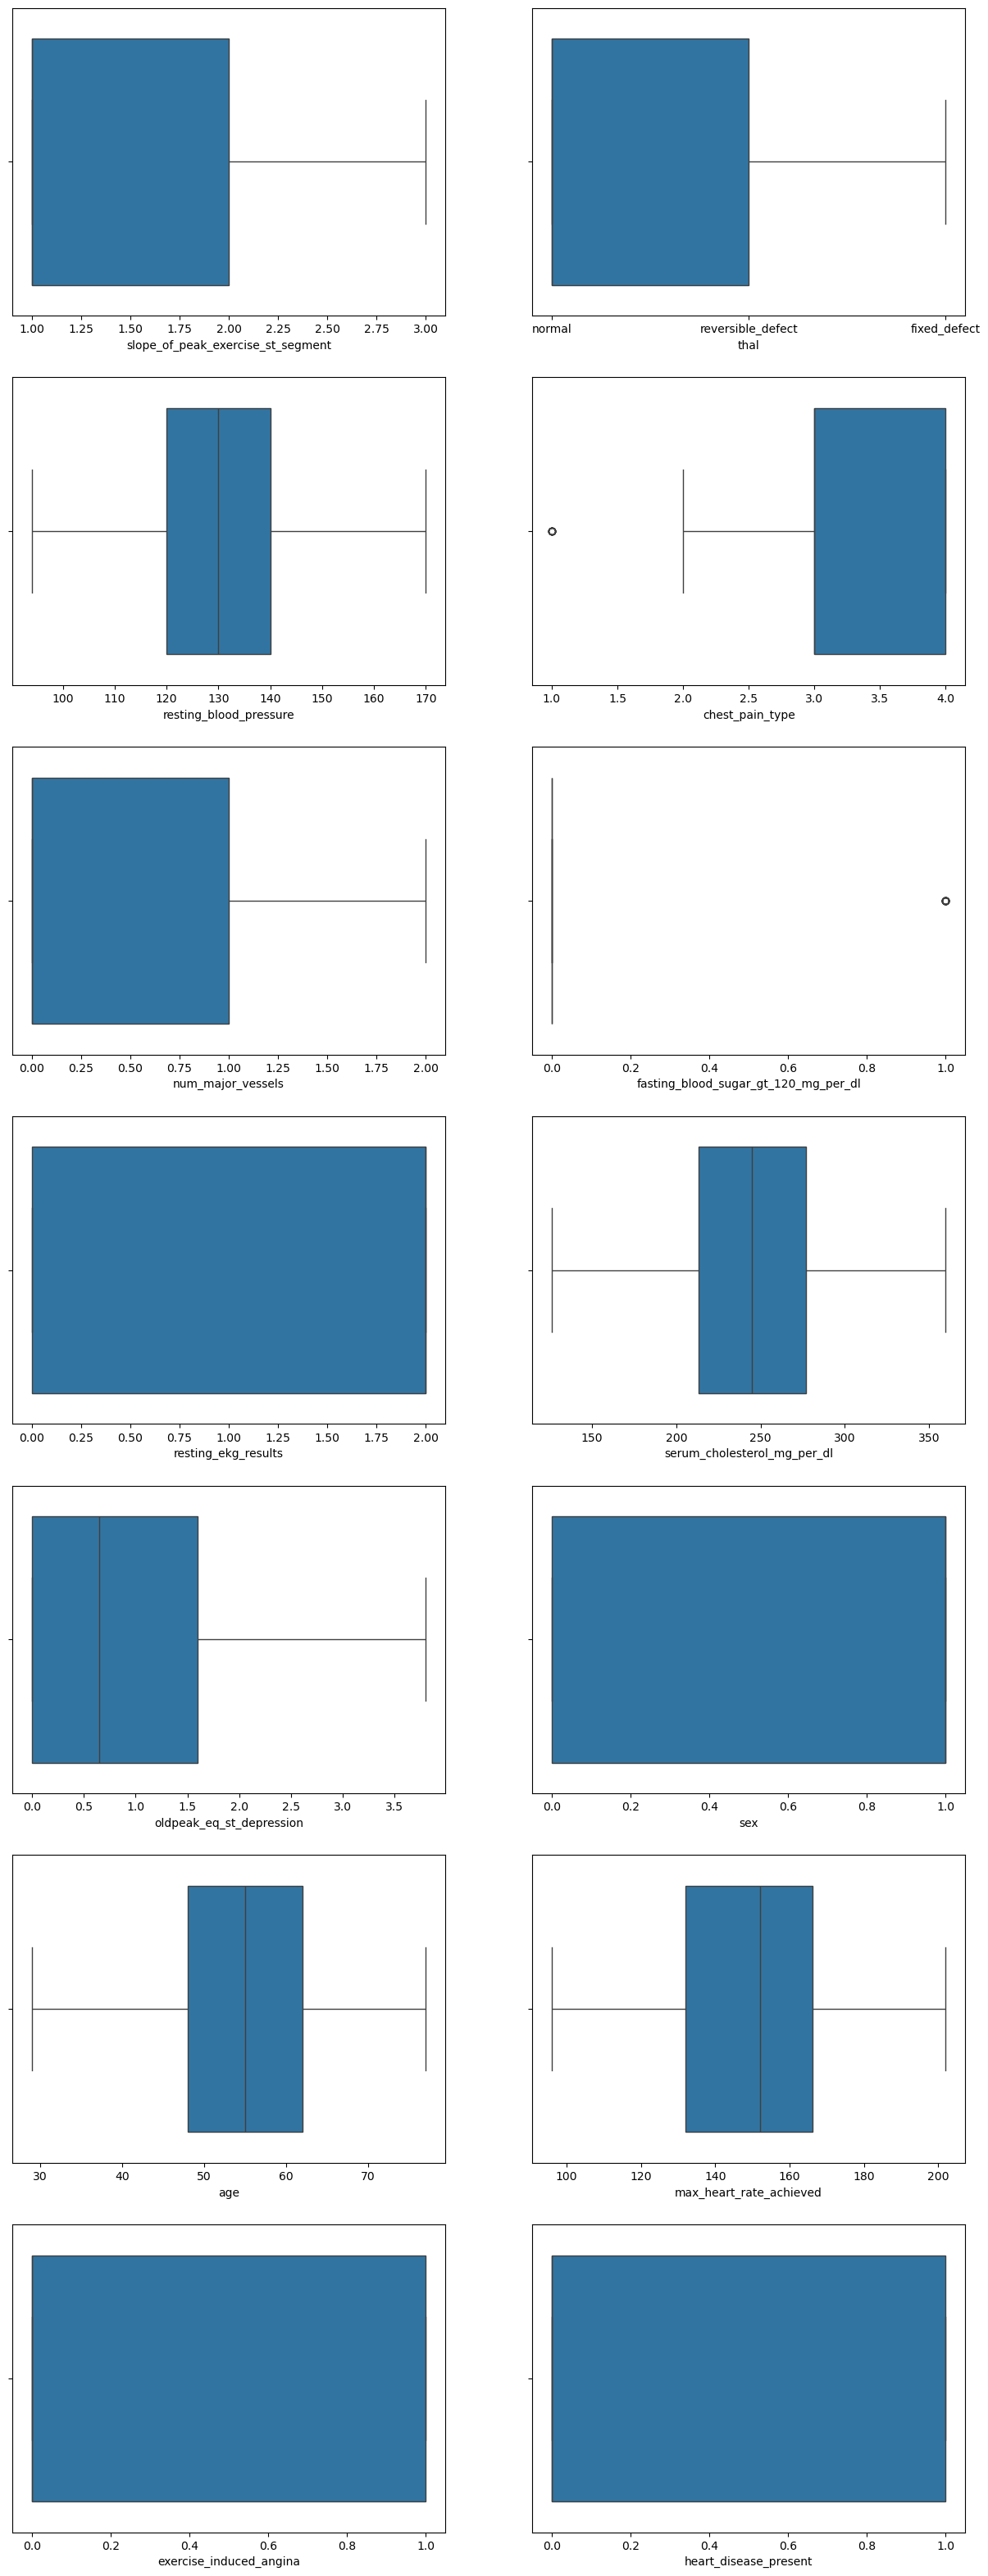

In [23]:
plt.figure(figsize=(15,40))
plotnumber=1
for i in dt:
    plt.subplot(7,2,plotnumber)
    sns.boxplot(x=i,data=dt)
    plotnumber+=1

## 7.Label Encoding Method:

### a. Thal features only categorical .so we have change into numerical. 

In [24]:
dt.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [25]:
scalar=LabelEncoder()
d=scalar.fit_transform(dt['thal'])
d

array([1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 1])

In [26]:
col=['thal']
d2=pd.DataFrame(d,columns=col)
d2.head()

,thal
0,1
1,1
2,1
3,2
4,2


In [27]:
dt.drop(['thal'],axis=1,inplace=True)

In [28]:
dt1=pd.concat([d2,dt],axis=1)
dt1.head()

,thal,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128.0,2,0.0,0,2,308.0,0.0,1,45,170,0,0
1,1,2,110.0,3,0.0,0,0,214.0,1.6,0,54,158,0,0
2,1,1,125.0,4,NaN,0,2,304.0,0.0,1,77,162,1,1
3,2,1,152.0,4,0.0,0,0,223.0,0.0,1,40,181,0,1
4,2,3,NaN,1,0.0,0,2,270.0,NaN,1,59,145,0,0


## 8.Implement the KNN Imputers :

In [29]:
impute=KNNImputer()
enc_2=impute.fit_transform(dt1)
enc_2

array([[  1.,   1., 128., ..., 170.,   0.,   0.],
       [  1.,   2., 110., ..., 158.,   0.,   0.],
       [  1.,   1., 125., ..., 162.,   1.,   1.],
       ...,
       [  2.,   2., 125., ..., 131.,   1.,   1.],
       [  1.,   1., 124., ..., 175.,   0.,   0.],
       [  1.,   1., 160., ..., 163.,   0.,   0.]])

In [30]:
data=pd.DataFrame(enc_2,columns=dt1.columns)
data.head()

,thal,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1.0,1.0,128.0,2.0,0.0,0.0,2.0,308.0,0.0,1.0,45.0,170.0,0.0,0.0
1,1.0,2.0,110.0,3.0,0.0,0.0,0.0,214.0,1.6,0.0,54.0,158.0,0.0,0.0
2,1.0,1.0,125.0,4.0,0.8,0.0,2.0,304.0,0.0,1.0,77.0,162.0,1.0,1.0
3,2.0,1.0,152.0,4.0,0.0,0.0,0.0,223.0,0.0,1.0,40.0,181.0,0.0,1.0
4,2.0,3.0,133.8,1.0,0.0,0.0,2.0,270.0,1.2,1.0,59.0,145.0,0.0,0.0


## 9.Features Correlation :

<Axes: >

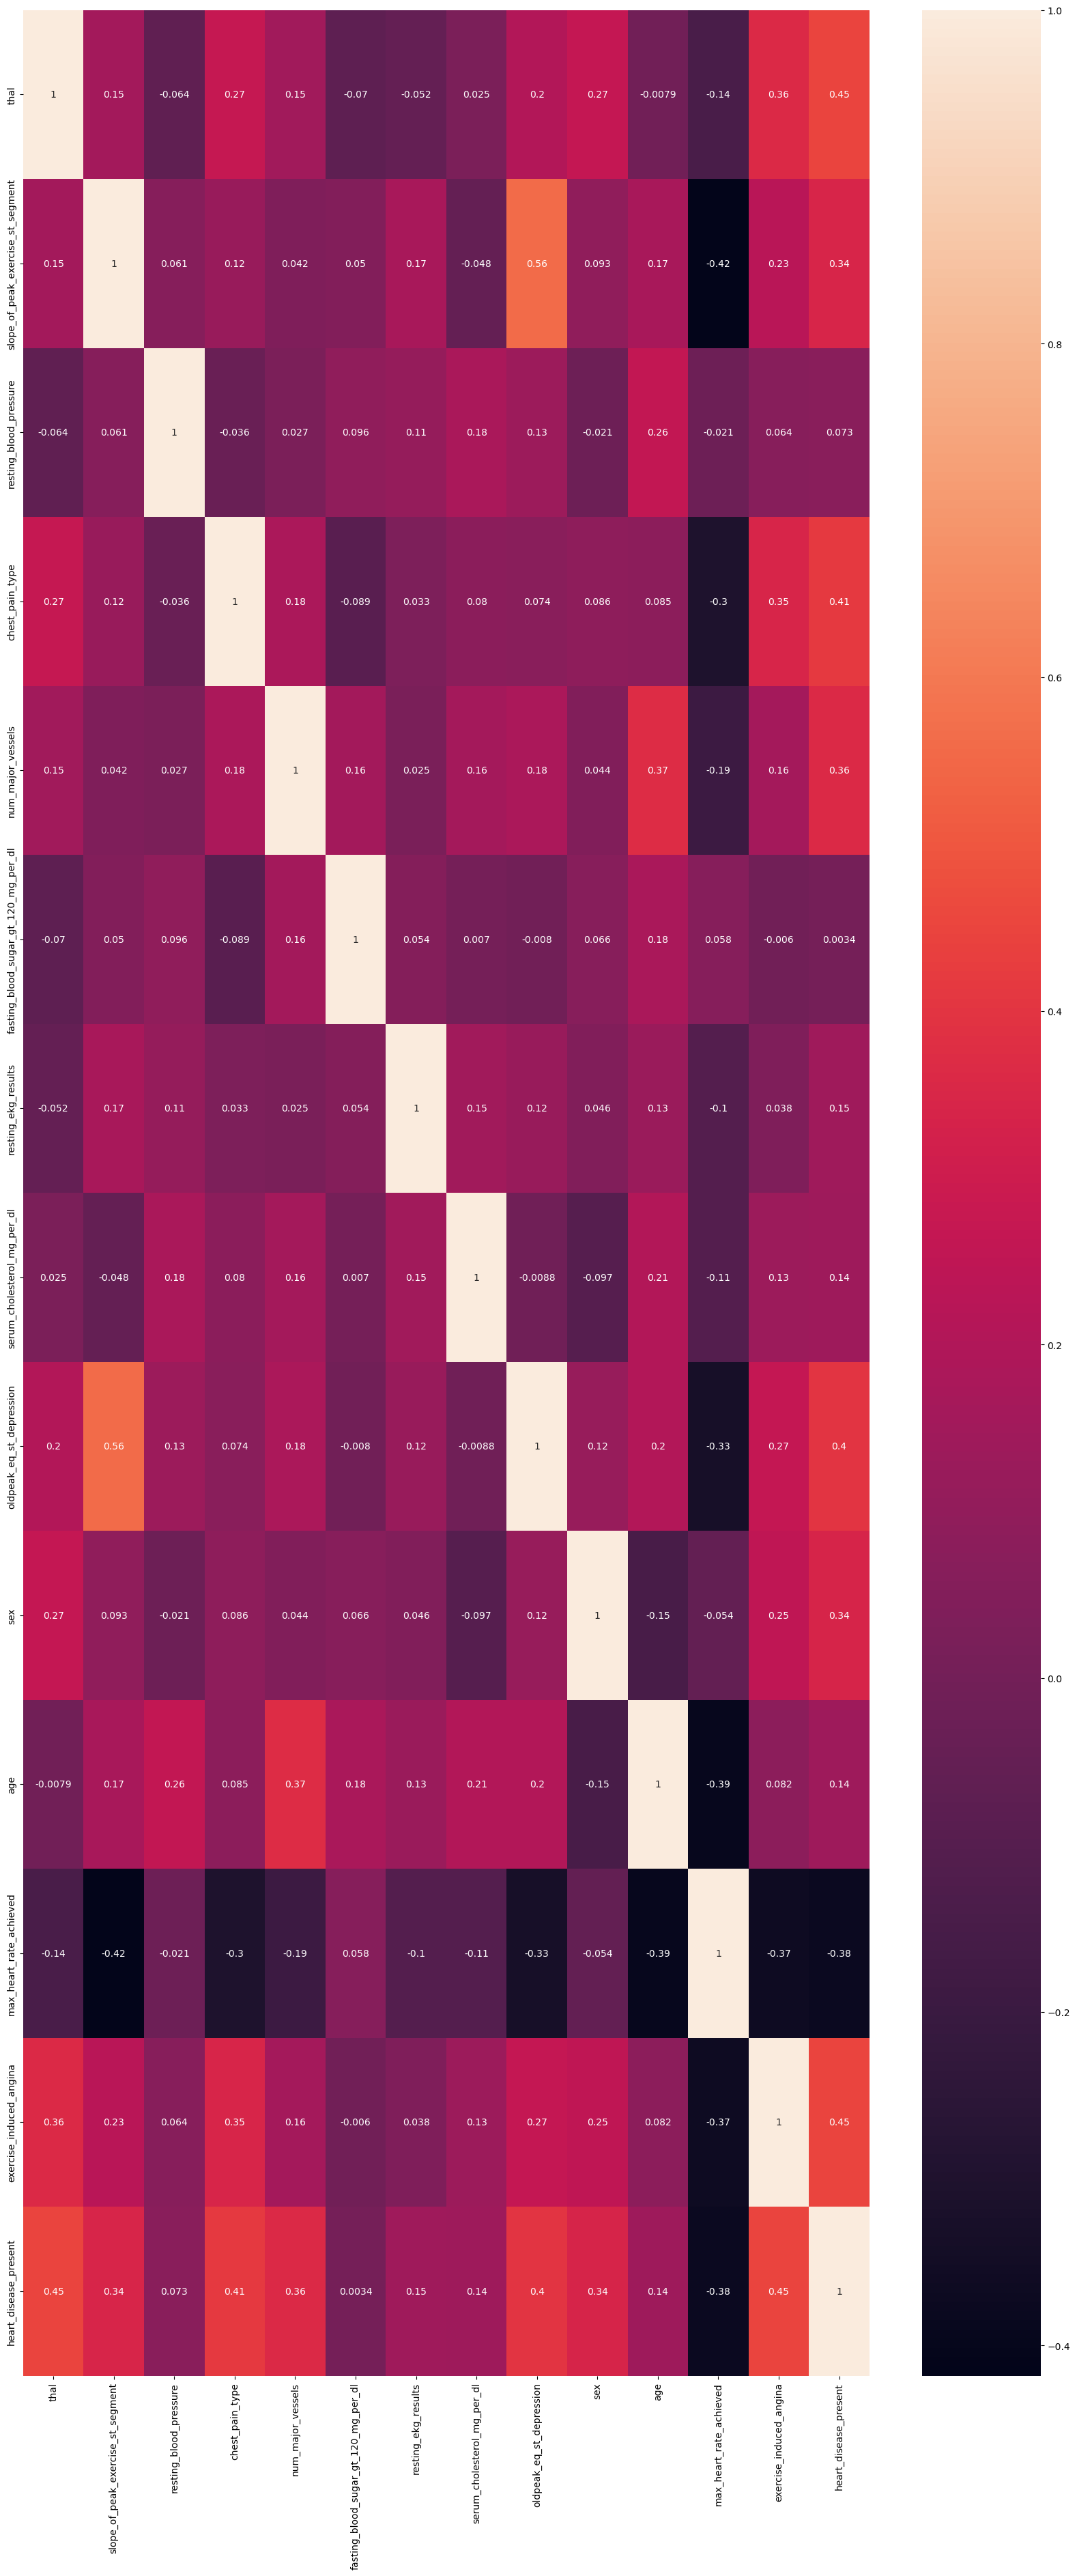

In [31]:
plt.figure(figsize=(20,45))
sns.heatmap(data.corr(),annot=True)

In [32]:
data.columns

Index(['thal', 'slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

## 10.Feature Scaling :

### a. we have use the Standard Scaler:

In [33]:
data.columns

Index(['thal', 'slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [34]:
enc=StandardScaler()
d=data.heart_disease_present
enc_1=enc.fit_transform(data.loc[:,:'exercise_induced_angina'])
enc_1

array([[-0.64705882, -0.89124111, -0.12858976, ..., -1.05396422,
         0.93248505, -0.68074565],
       [-0.64705882,  0.72919727, -1.35758929, ..., -0.08713407,
         0.38708356, -0.68074565],
       [-0.64705882, -0.89124111, -0.33342302, ...,  2.38365407,
         0.56888406,  1.46897745],
       ...,
       [ 1.11764706,  0.72919727, -0.33342302, ...,  0.98712164,
        -0.8400698 ,  1.46897745],
       [-0.64705882, -0.89124111, -0.40170077, ..., -0.7316875 ,
         1.15973567, -0.68074565],
       [-0.64705882, -0.89124111,  2.05629828, ..., -0.08713407,
         0.61433418, -0.68074565]])

In [35]:
d1=data.loc[:,:'exercise_induced_angina']

In [36]:
df=pd.DataFrame(enc_1,columns=d1.columns)
df.head()

,thal,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,-0.647059,-0.891241,-0.128590,-1.234775,-0.726235,-0.438238,0.953850,1.349844,-0.995895,0.672022,-1.053964,0.932485,-0.680746
1,-0.647059,0.729197,-1.357589,-0.166220,-0.726235,-0.438238,-1.054255,-0.722882,0.722194,-1.488048,-0.087134,0.387084,-0.680746
2,-0.647059,-0.891241,-0.333423,0.902335,0.403115,-0.438238,0.953850,1.261643,-0.995895,0.672022,2.383654,0.568884,1.468977
3,1.117647,-0.891241,1.510076,0.902335,-0.726235,-0.438238,-1.054255,-0.524429,-0.995895,0.672022,-1.591092,1.432436,-0.680746
4,1.117647,2.349636,0.267421,-2.303330,-0.726235,-0.438238,0.953850,0.511934,0.292672,0.672022,0.449994,-0.203768,-0.680746


In [37]:
df1=pd.concat([df,d],axis=1)
df1.head()

,thal,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,-0.647059,-0.891241,-0.128590,-1.234775,-0.726235,-0.438238,0.953850,1.349844,-0.995895,0.672022,-1.053964,0.932485,-0.680746,0.0
1,-0.647059,0.729197,-1.357589,-0.166220,-0.726235,-0.438238,-1.054255,-0.722882,0.722194,-1.488048,-0.087134,0.387084,-0.680746,0.0
2,-0.647059,-0.891241,-0.333423,0.902335,0.403115,-0.438238,0.953850,1.261643,-0.995895,0.672022,2.383654,0.568884,1.468977,1.0
3,1.117647,-0.891241,1.510076,0.902335,-0.726235,-0.438238,-1.054255,-0.524429,-0.995895,0.672022,-1.591092,1.432436,-0.680746,1.0
4,1.117647,2.349636,0.267421,-2.303330,-0.726235,-0.438238,0.953850,0.511934,0.292672,0.672022,0.449994,-0.203768,-0.680746,0.0


## 11.Data Splitting into train and test :

In [38]:
X=df1.loc[:,:'exercise_induced_angina']
y=df1.heart_disease_present

In [39]:
y

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
175    1.0
176    1.0
177    1.0
178    0.0
179    0.0
Name: heart_disease_present, Length: 180, dtype: float64

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [61]:
X_train.shape

(144, 13)

In [62]:
X_test.shape

(36, 13)

In [63]:
y_train.shape

(144,)

In [64]:
y_test.shape

(36,)

In [65]:
y_train.value_counts()

heart_disease_present
0.0    78
1.0    66
Name: count, dtype: int64

## 12.Logistic Regression Model :

In [66]:
model_logis=LogisticRegression()
model_logis.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred_logis=model_logis.predict(X_test)
y_pred_logis

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0.])

## 13.Logistic Model Evaluation Metrics :

In [68]:
print(classification_report(y_test,y_pred_logis))

              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79        22
         1.0       0.70      0.50      0.58        14

    accuracy                           0.72        36
   macro avg       0.72      0.68      0.69        36
weighted avg       0.72      0.72      0.71        36



In [69]:
f1_logistic=f1_score(y_test,y_pred_logis)
f1_logistic

0.5833333333333334

In [70]:
pd.crosstab(pd.Series(y_test,name='Actual'),
            pd.Series(y_pred_logis,name='Predicted'))

Predicted,0.0,1.0
Actual,,
0.0,5,0
1.0,0,2


## 14.Hyper Parameter Tuning for Logistic Regression : 

In [ ]:
params={'penalty':['l1','l2'],
       'fit_intercept':[True,False],
       'random_state':[20,30,40,50],
       'solver':['lbfgs','liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
       }

In [ ]:
gvsearch_logis=GridSearchCV(model_logis,param_grid=params,cv=3,verbose=1,scoring='f1')
gvsearch_logis.fit(X_train,y_train)

In [ ]:
gvsearch_logis.best_params_

In [51]:
model_logis_hyper=LogisticRegression(fit_intercept=True,penalty='l1',random_state=20,solver='liblinear',class_weight={0.0:1,1.0:1.5})
model_logis_hyper.fit(X_train,y_train)

LogisticRegression(class_weight={0.0: 1, 1.0: 1.5}, penalty='l1',
                   random_state=20, solver='liblinear')

In [52]:
y_pred_logis_hyper=model_logis_hyper.predict(X_test)
y_pred_logis_hyper

array([0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0.])

## 15.Logistic Hyper Parameter Evaluation Metrics :

In [53]:
print(classification_report(y_test,y_pred_logis_hyper))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82        16
         1.0       0.89      0.80      0.84        20

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



In [54]:
f1_logistic_hyper=f1_score(y_test,y_pred_logis_hyper)
f1_logistic_hyper

0.8421052631578948

In [55]:
pd.crosstab(pd.Series(y_test,name='Actual'),
                      pd.Series(y_pred_logis_hyper,name='Predicted'))

Predicted,0.0,1.0
Actual,,
0.0,1,5
1.0,1,1


## 16.Artificial Neural Network Model : 

In [71]:
model_ann=MLPClassifier(random_state=42)
model_ann_1=model_ann.fit(X_train,y_train)
model_ann_1

MLPClassifier(random_state=42)

In [75]:
y_pred_ann=model_ann_1.predict(X_test)
y_pred_ann

array([0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0.])

## 17.Artificial Neural Network Metrics :

In [76]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

         0.0       0.72      0.82      0.77        22
         1.0       0.64      0.50      0.56        14

    accuracy                           0.69        36
   macro avg       0.68      0.66      0.66        36
weighted avg       0.69      0.69      0.69        36



In [60]:
f1_ann=f1_score(y_test,y_pred_ann)
f1_ann

0.8648648648648648

In [61]:
pd.crosstab(pd.Series(y_test,name='Actual'),
            pd.Series(y_pred_ann,name='Predicted'))

Predicted,0.0,1.0
Actual,,
0.0,1,5
1.0,1,1


## 18.Hyper Parameter Tuning for Artificial Neural Network: 

In [62]:
params={'activation':['identity', 'logistic', 'tanh', 'relu'],
       'solver':['lbfgs', 'sgd', 'adam'],
       'batch_size':[200,150,100,250],
       'max_iter':[200,500,700,1000,1200,2000],
       'random_state':[20,30,40,50,42,28,25],
       }

In [63]:
gvsearch_ann=GridSearchCV(model_ann,param_grid=params,cv=3,verbose=1,scoring='f1')
gvsearch_ann.fit(X_train,y_train)

Fitting 3 folds for each of 2016 candidates, totalling 6048 fits


KeyboardInterrupt: 

In [ ]:
gvsearch_ann.best_params_

In [73]:
model_ann_2=MLPClassifier(hidden_layer_sizes=(150,3),activation='relu',batch_size=200,max_iter=2500,random_state=42,solver='adam')
model_ann_2.fit(X_train,y_train)

MLPClassifier(batch_size=200, hidden_layer_sizes=(150, 3), max_iter=2500,
              random_state=42)

In [74]:
y_pred_ann_hyper=model_ann_2.predict(X_test)
y_pred_ann_hyper

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0.])

## 19. Artificial Neural Networks Hyper Parmeter Evaluation Metrics:

In [63]:
print(classification_report(y_test,y_pred_ann_hyper))

              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83        16
         1.0       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



In [64]:
f1_ann_hyper=f1_score(y_test,y_pred_ann_hyper)
f1_ann_hyper

0.8333333333333334

In [65]:
pd.crosstab(pd.Series(y_test,name='Actual'),
            pd.Series(y_pred_ann_hyper,name='Predicted'))


Predicted,0.0,1.0
Actual,,
0.0,2,4
1.0,1,1


## 20.Support Vector Machines Model :

In [66]:
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [67]:
y_pred_svc=model_svc.predict(X_test)
y_pred_svc

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0.])

## 21. Support Vector Machine Evaluation Metrics:

In [68]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        16
         1.0       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



In [70]:
f1_svc=f1_score(y_test,y_pred_svc)
f1_svc

0.8571428571428571

In [69]:
pd.crosstab(pd.Series(y_test,name='Actual'),
            pd.Series(y_pred_svc,name='Predicted'))

Predicted,0.0,1.0
Actual,,
0.0,2,4
1.0,1,1


## 22.Hyper Parameter Tuning For Support Vector Machine: 

In [71]:
params_svc={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
           'max_iter':[100,200,300,400,500],
            'C':[1.0,2.0,3.0,4.0],
            'gamma':['scale','auto']
           }

In [79]:
gvsearch_svc=GridSearchCV(model_svc,param_grid=params_svc,cv=3,verbose=1,scoring='f1')
gvsearch_svc.fit(X_train,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 200, 300, 400, 500]},
             scoring='f1', verbose=1)

In [80]:
gvsearch_svc.best_params_

{'C': 2.0, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 400}

In [72]:
model_svc_1=SVC(class_weight={0.0:1.0,1.0:1.4},random_state=42,verbose=1,C=2.0,gamma='scale',kernel='rbf',max_iter=400)
model_svc_1.fit(X_train,y_train)

[LibSVM]

SVC(C=2.0, class_weight={0.0: 1.0, 1.0: 1.4}, max_iter=400, random_state=42,
    verbose=1)

In [58]:
y_train.value_counts()

heart_disease_present
0.0    78
1.0    66
Name: count, dtype: int64

In [59]:
y_pred_svc_hyper=model_svc_1.predict(X_test)
y_pred_svc_hyper

NameError: name 'model_svc_1' is not defined

## 23. Support Vector Machine Hyper Parameter Evaluation Metrics:

In [ ]:
print(classification_report(y_test,y_pred_svc_hyper))

In [77]:
f1_svc_hyper=f1_score(y_test,y_pred_svc_hyper)
f1_svc_hyper

0.8648648648648648

In [78]:
pd.crosstab(pd.Series(y_test,name='Actual'),
            pd.Series(y_pred_svc_hyper,name='Predicted'))

Predicted,0.0,1.0
Actual,,
0.0,2,4
1.0,1,1


## 24.Decision Tree Model :

In [79]:
model_decision_1=DecisionTreeClassifier()

In [80]:
model_decision=DecisionTreeClassifier()
model_decision.fit(X_train,y_train)


DecisionTreeClassifier()

In [81]:
y_pred_decision=model_decision.predict(X_test)
y_pred_decision

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0.])

## 25.Decision Tree Evaluation Metrics:

In [82]:
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81        16
         1.0       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



In [83]:
f1_decision=f1_score(y_test,y_pred_decision)
f1_decision

0.8

In [84]:
pd.crosstab(pd.Series(y_test,name='Actual'),
            pd.Series(y_pred_decision,name='Predicted'))

Predicted,0.0,1.0
Actual,,
0.0,2,4
1.0,1,1


## 26.Hyper Parameter Tuning For Decision Tree :

In [92]:
params_decision={'criterion':['gini','entropy'],
                'max_depth':[10,20,30,40,50],
                'min_samples_split':[10,20,30,40,50],
                'min_samples_leaf':[10,20,30,40,50],
                }

In [93]:
gvsearch_decision=GridSearchCV(model_decision,param_grid=params_decision,cv=3,verbose=1,scoring='f1')
gvsearch_decision.fit(X_train,y_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [10, 20, 30, 40, 50],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='f1', verbose=1)

In [97]:
gvsearch_decision.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [85]:
model_de=DecisionTreeClassifier(class_weight={0.0:1.0,1.0:1.8},random_state=32,criterion='gini',max_depth=10,min_samples_leaf=10,min_samples_split=50)
model_de.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0.0: 1.0, 1.0: 1.8}, max_depth=10,
                       min_samples_leaf=10, min_samples_split=50,
                       random_state=32)

In [86]:
y_pred_hyper_decision=model_de.predict(X_test)
y_pred_hyper_decision

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1.])

## 27.Decision Tree Hyper Parameter Evaluation Metrics :

In [87]:
print(classification_report(y_test,y_pred_hyper_decision))

              precision    recall  f1-score   support

         0.0       0.71      0.62      0.67        16
         1.0       0.73      0.80      0.76        20

    accuracy                           0.72        36
   macro avg       0.72      0.71      0.71        36
weighted avg       0.72      0.72      0.72        36



In [88]:
f1_decision_hyper=f1_score(y_test,y_pred_hyper_decision)
f1_decision_hyper

0.761904761904762

In [89]:
pd.crosstab(pd.Series(y_test,name='Actual'),
            pd.Series(y_pred_hyper_decision,name='Predicted'))

Predicted,0.0,1.0
Actual,,
0.0,2,4
1.0,1,1


## 28.XGBoost model:

In [90]:
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
y_pred_xgb=model_xgb.predict(X_test)
y_pred_xgb

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

## 29. XGBoost Evaluation Metrics :

In [92]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78        16
         1.0       0.88      0.70      0.78        20

    accuracy                           0.78        36
   macro avg       0.79      0.79      0.78        36
weighted avg       0.80      0.78      0.78        36



In [93]:
f1_xgb=f1_score(y_test,y_pred_xgb)
f1_xgb

0.7777777777777777

In [94]:
pd.crosstab(pd.Series(y_test,name='Actaul'),
            pd.Series(y_pred_xgb,name='Predicted'))

Predicted,0,1
Actaul,,
0.0,2,4
1.0,1,1


## 30.Naive Bayes Theorem Model :

In [95]:
model_naive=GaussianNB()
model_naive.fit(X_train,y_train)

GaussianNB()

In [96]:
y_pred_naive=model_naive.predict(X_test)
y_pred_naive

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0.])

## 31.Naive Bayes Thereom Evaluation Metrics :

In [97]:
print(classification_report(y_test,y_pred_naive))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82        16
         1.0       1.00      0.65      0.79        20

    accuracy                           0.81        36
   macro avg       0.85      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36



In [98]:
f1_naive=f1_score(y_test,y_pred_naive)
f1_naive

0.787878787878788

In [99]:
pd.crosstab(pd.Series(y_test,name='Actual'),
            pd.Series(y_pred_naive,name='Predicted'))

Predicted,0.0,1.0
Actual,,
0.0,3,3
1.0,1,1


## 32. Comparision for all f1_Score Percentages:

In [100]:
scores={'logistic_Regression':84.21,'LR_hypertunning':84.21,'ANN':86.48,'ANN_hypertunning':83.34,
       'SVC':85.71,'SVC_hypertunning':86.48,'DecisionTree':74.28,'DecisionTree_hypertunning':76.19,
        'XGBoost':77.78,'Naive':78.78}
score_key=list(scores.keys())
score_value=list(scores.values())

Text(0.5, 1.0, 'Model Performance')

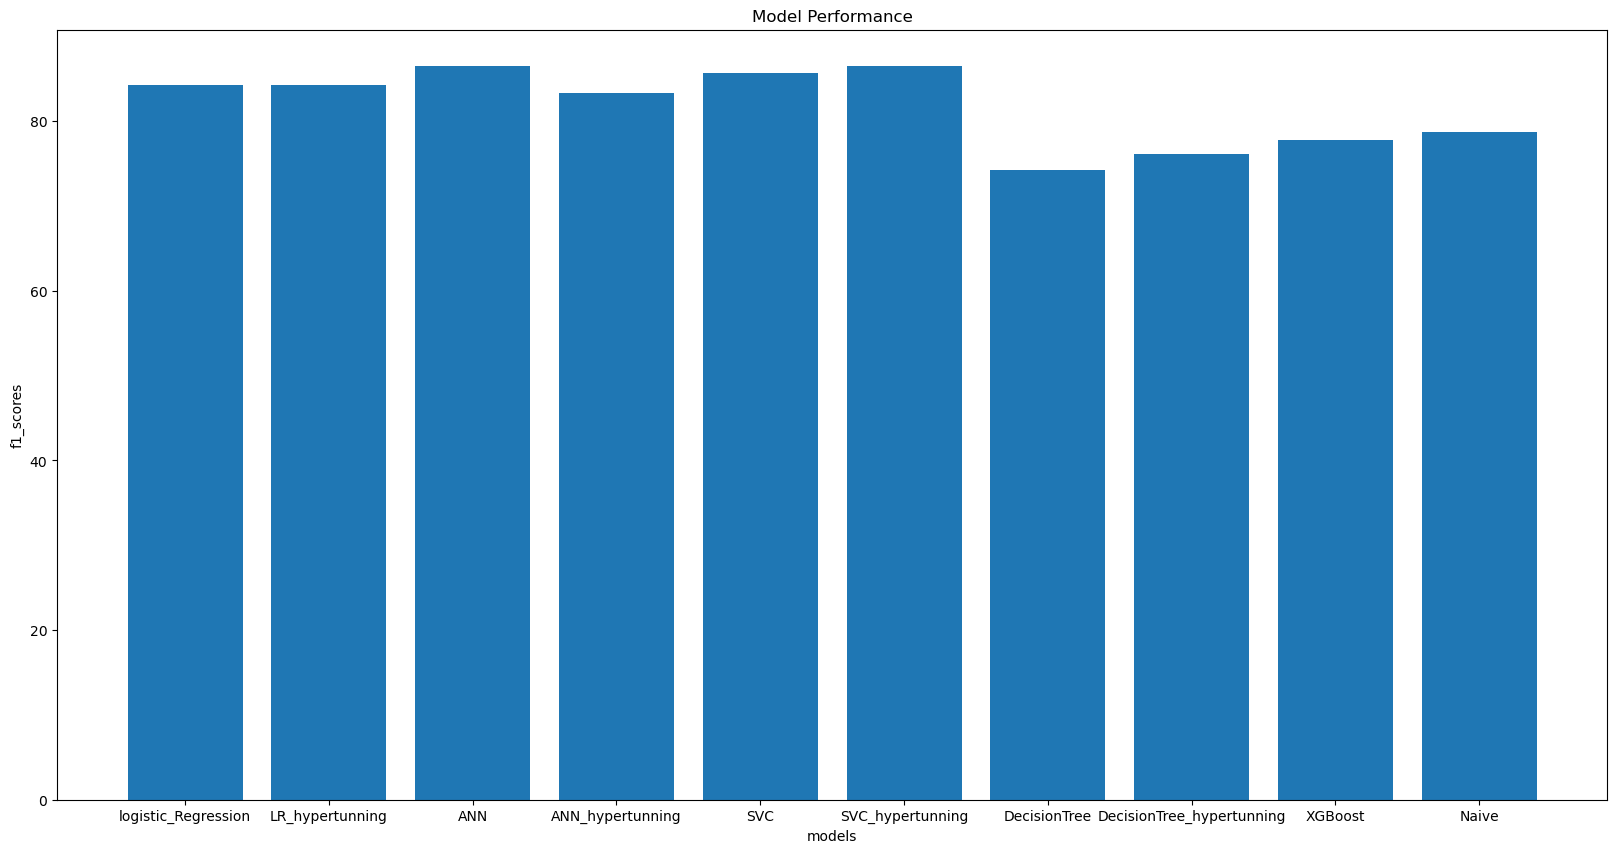

In [101]:
plt.figure(figsize=(20,10))
plt.bar(score_key,score_value)
plt.xlabel('models')
plt.ylabel('f1_scores')
plt.title('Model Performance')


In [102]:
df = pd.DataFrame(list(scores.items()), columns=['Model', 'F1 Score'])

# Display the sorted DataFrame


In [103]:
df_sorted = df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print("Sorted Scores:")
df_sorted

Sorted Scores:


,Model,F1 Score
0,ANN,86.48
1,SVC_hypertunning,86.48
2,SVC,85.71
3,logistic_Regression,84.21
4,LR_hypertunning,84.21
5,ANN_hypertunning,83.34
6,Naive,78.78
7,XGBoost,77.78
8,DecisionTree_hypertunning,76.19
9,DecisionTree,74.28


# Find the best and worst performing models


In [104]:
best_model = df_sorted.iloc[0]
worst_model = df_sorted.iloc[-1]

print("\nBest Model:")
print(best_model)

print("\nWorst Model:")
print(worst_model)




Best Model:
Model         ANN
F1 Score    86.48
Name: 0, dtype: object

Worst Model:
Model       DecisionTree
F1 Score           74.28
Name: 9, dtype: object


# Based on the F1 scores you provided for various models, here's a detailed conclusion and suggestions for doctors on how to use this heart disease dataset effectively:

# Conclusion
## Model Performance Overview:
* The ANN (Artificial Neural Network) and SVC with Hyperparameter Tuning both achieved the highest F1 score of 86.48, indicating they are the most effective at balancing precision and recall.
* The SVC (Support Vector Classification), without hyperparameter tuning, performed well with an F1 score of 85.71, slightly lower than the tuned version.
* The Logistic Regression and its hyperparameter-tuned version both scored 84.21, suggesting they are reliable but slightly less effective than SVC and ANN.
* The ANN with Hyperparameter Tuning scored 83.34, which is lower than its base version, suggesting that hyperparameter tuning might not have improved its performance in this case.
* Models like Naive Bayes and XGBoost scored 78.78 and 77.78, respectively, showing less effective performance compared to others.
* The Decision Tree models, with scores of 76.19 (tuned) and 74.28 (base), are the least effective among the models tested.

# Final Model Recommendation:
 ANN and SVC with Hyperparameter Tuning are the top-performing models and can be considered for deployment due to their high F1 scores. They are equally effective, so the choice between them might depend on other factors such as computational resources, interpretability, and ease of implementation.

# Suggestions for Doctors:

## Utilize the Best Model:

ANN or SVC with Hyperparameter Tuning should be chosen for practical use, given their superior performance. These models can be used to predict heart disease risk more accurately.



## Integration into Clinical Practice:


### Implementation in Diagnostic Tools:
Integrate the chosen model into diagnostic tools to help in early detection of heart disease. This can improve patient outcomes by enabling timely intervention.

### Decision Support Systems:
Use the model to support clinical decision-making by providing risk assessments and suggesting potential diagnostic tests or treatments based on patient data.


## Advantages of Using the Model:

### Improved Accuracy:
The high F1 score indicates a good balance between precision and recall, minimizing false positives and negatives, which is crucial for effective diagnosis and treatment planning.

### Efficient Screening:
The model can efficiently screen large populations, identifying individuals at higher risk for heart disease, which helps in prioritizing follow-up and preventive measures.

### Personalized Medicine:
The model can aid in tailoring treatment plans based on individual risk profiles, leading to more personalized and effective healthcare.




## Continued Model Improvement:

### Regular Updates:
Continuously update the model with new data to maintain and improve accuracy. This ensures the model adapts to changes in patient demographics and medical knowledge.

### Feedback Loop:
Establish a feedback mechanism to assess the model’s performance in real-world settings and make adjustments as necessary.




## Educational Training:

### Training for Medical Staff:
Provide training for doctors and healthcare professionals on how to interpret the model's predictions and integrate them into their clinical workflows.

By following these recommendations, the dataset and model can significantly contribute to better heart disease management and patient care.
